The aim of this analysis is to investigate a range of health-related factors and their interconnections to predict individual medical costs billed by health insurance accurately. These factors include aspects such as age, gender, body mass index (BMI), number of children, smoking status, and region. This comprehensive examination will not only provide insights into the patterns and trends in health insurance charges but will also create a solid base for further research. Specifically, research can be built on how these variables interact and influence the cost of health insurance, crucial knowledge for improving insurance policy design and outcomes in this increasingly critical area of healthcare.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
df =  pd.read_csv("/content/sample_data/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.shape

(1338, 7)

In [ ]:
duplicate_df = df[df.duplicated()]
print("No of Duplicates row : ", duplicate_df.shape)

No of Duplicates row :  (1, 7)


In [ ]:
df = df.drop_duplicates()

In [ ]:
df.shape

(1337, 7)

In [ ]:
#No of unique values
for col in df.columns:
  unique_vals = len(df[col].unique())
  print( f"{col} : {unique_vals}  distinct values")




age : 47  distinct values
sex : 2  distinct values
bmi : 548  distinct values
children : 6  distinct values
smoker : 2  distinct values
region : 4  distinct values
charges : 1337  distinct values


In [ ]:
#finding null values
print(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [ ]:
df.describe().style.format("{:.2f}")

,age,bmi,children,charges
count,1337.00,1337.00,1337.00,1337.00
mean,39.22,30.66,1.10,13279.12
std,14.04,6.10,1.21,12110.36
min,18.00,15.96,0.00,1121.87
25%,27.00,26.29,0.00,4746.34
50%,39.00,30.40,1.00,9386.16
75%,51.00,34.70,2.00,16657.72
max,64.00,53.13,5.00,63770.43


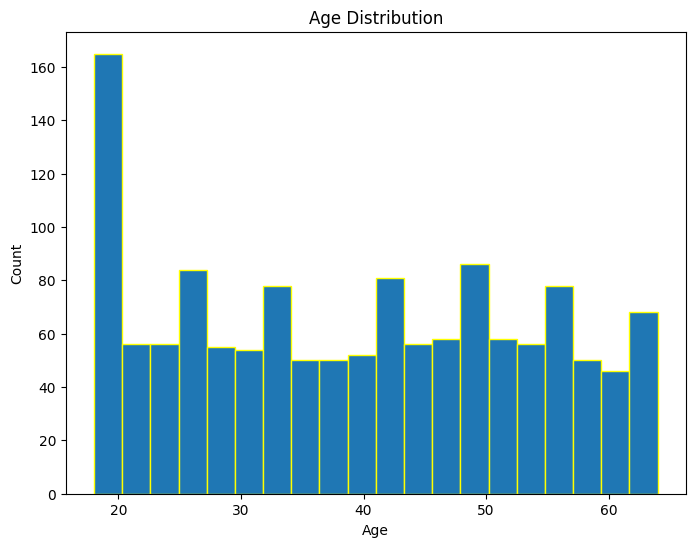

In [ ]:
plt.figure(figsize=(8,6))

plt.hist(df['age'] , bins=20 , edgecolor='yellow')
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution")

plt.show()


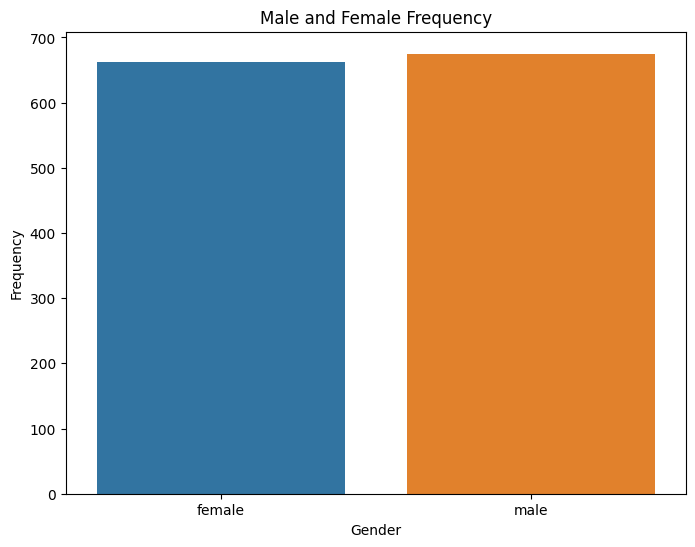

In [ ]:
#Gender count

plt.figure(figsize=(8,6))

sns.countplot(data=df , x='sex')

plt.xlabel("Gender")
plt.ylabel("Frequency")

plt.title("Male and Female Frequency")

plt.show()

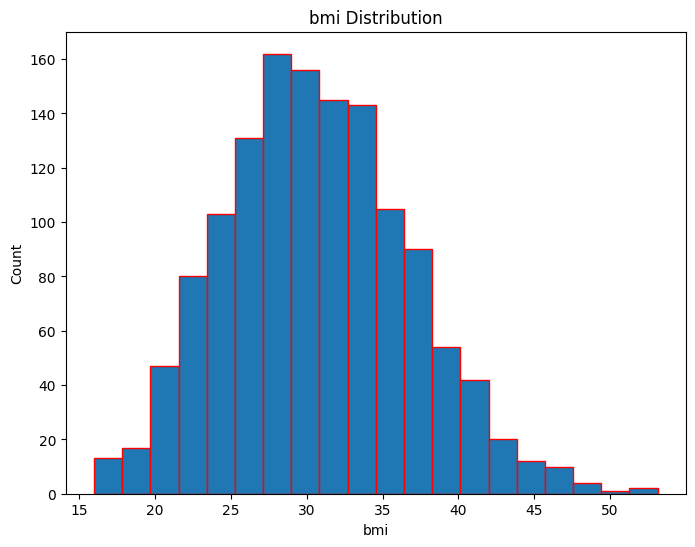

In [ ]:
plt.figure(figsize=(8,6))

plt.hist(df['bmi'] , bins=20 , edgecolor='red')
plt.xlabel("bmi")
plt.ylabel("Count")
plt.title("bmi Distribution")

plt.show()

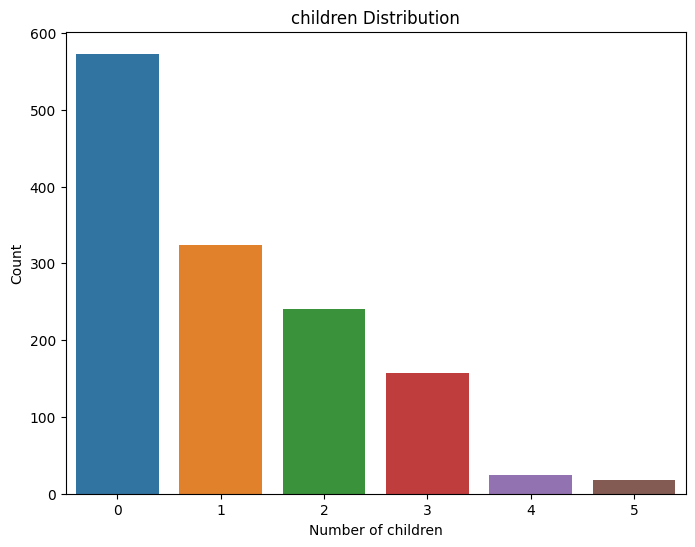

In [ ]:
plt.figure(figsize=(8,6))

sns.countplot(data=df ,x='children')
plt.xlabel("Number of children")
plt.ylabel("Count")
plt.title("children Distribution")

plt.show()

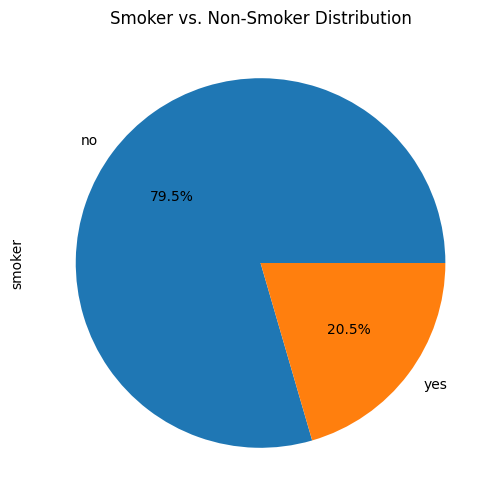

In [ ]:
plt.figure(figsize=(6, 6))  # Optional: Set the figure size
df['smoker'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Smoker vs. Non-Smoker Distribution')
plt.show()

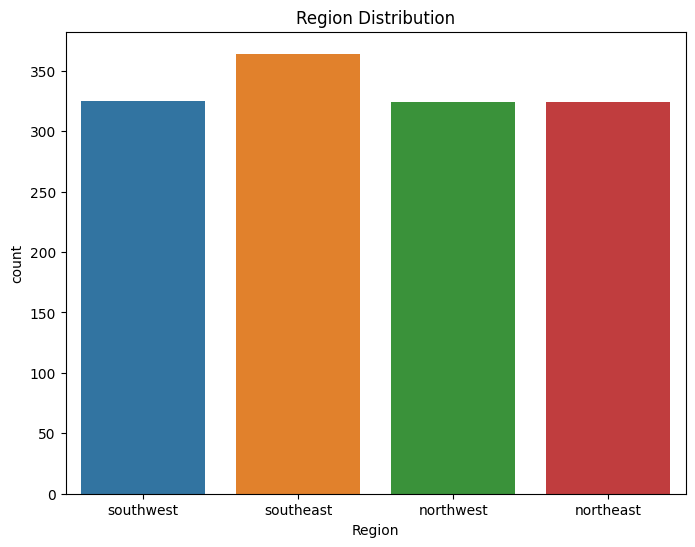

In [ ]:
plt.figure(figsize=(8,6))

sns.countplot(data = df , x='region')

plt.xlabel("Region")
plt.ylabel("count")

plt.title("Region Distribution")
plt.show()

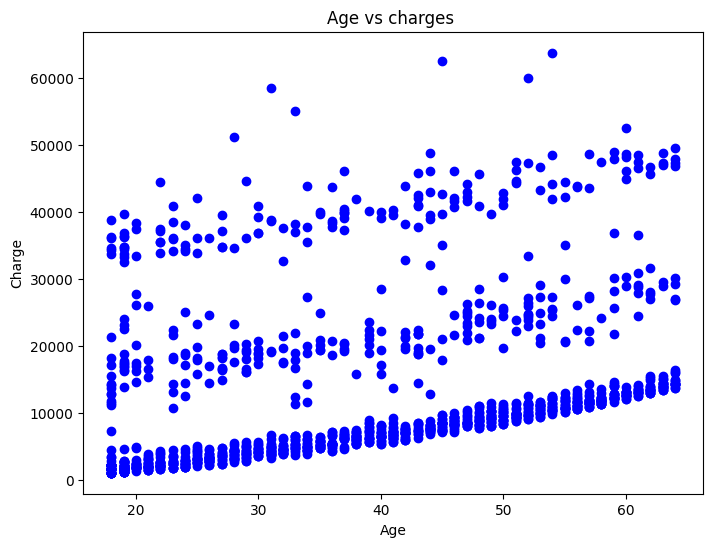

In [ ]:
#Scatter plot to find relationship of Age and Charges

plt.figure(figsize=(8,6))

plt.scatter(df['age'] , df['charges'], color='blue')
plt.xlabel("Age")
plt.ylabel("Charge")

plt.title("Age vs charges ")

plt.show()

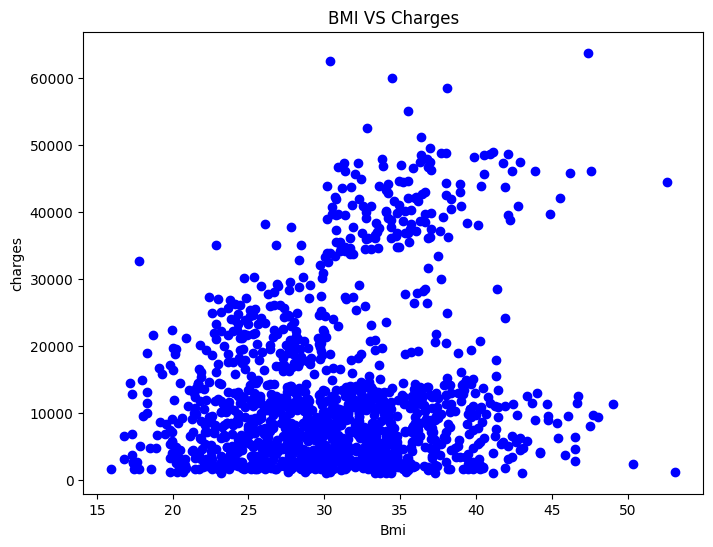

In [ ]:
#scatter plot of bmi vs charges
plt.figure(figsize=(8,6))

plt.scatter(df['bmi'] , df['charges'] , color='blue')

plt.xlabel("Bmi")
plt.ylabel("charges")

plt.title("BMI VS Charges")

plt.show()

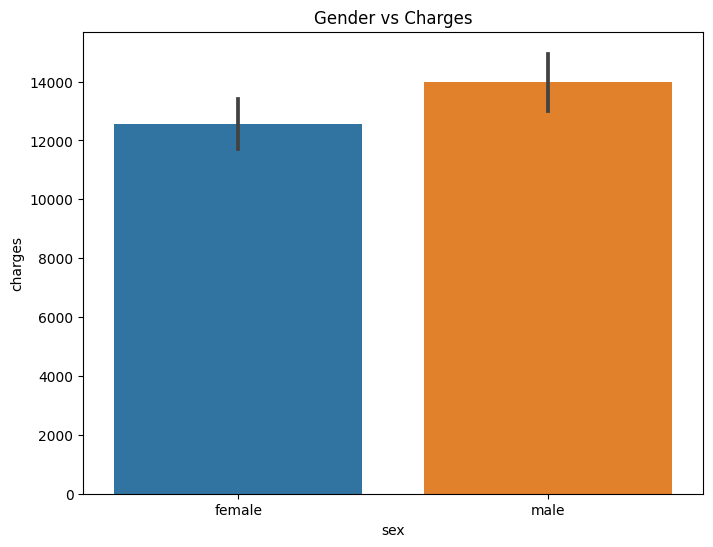

In [ ]:
plt.figure(figsize=(8,6))

sns.barplot(data = df , x='sex' ,y='charges')

plt.title("Gender vs Charges")

plt.show()

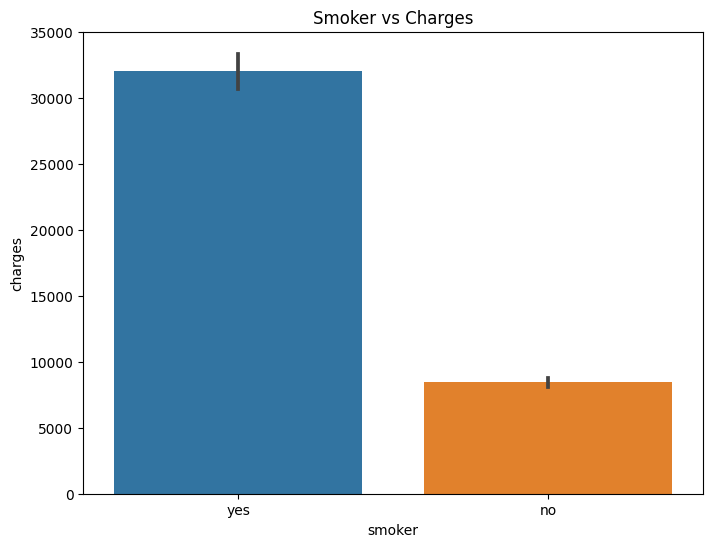

In [ ]:
plt.figure(figsize=(8,6))

sns.barplot(data = df , x='smoker' ,y='charges')

plt.title("Smoker vs Charges")

plt.show()

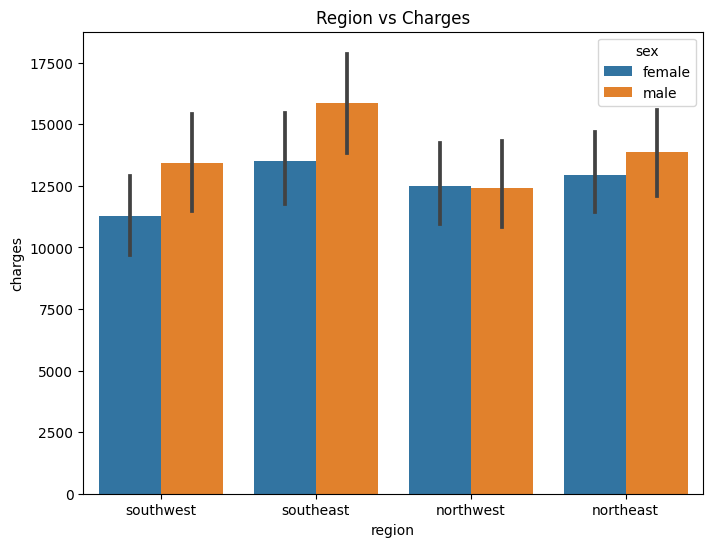

In [ ]:
plt.figure(figsize=(8,6))

sns.barplot(data = df , x='region' ,y='charges' , hue='sex')

plt.title("Region vs Charges")

plt.show()

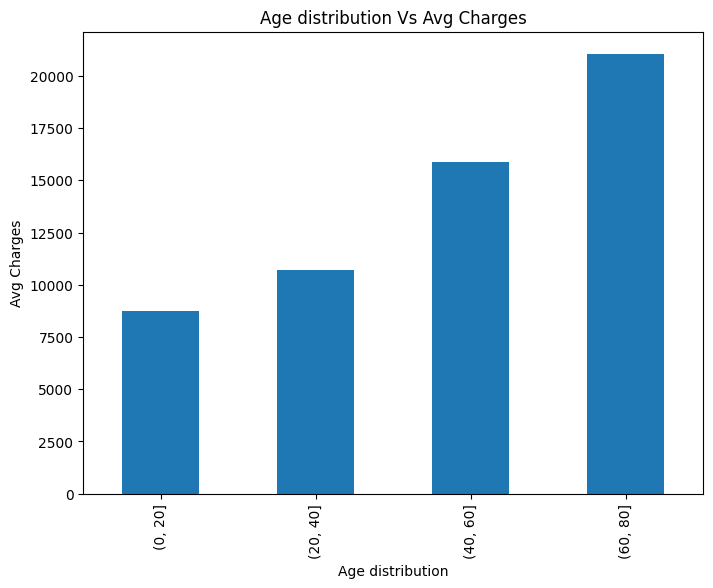

In [ ]:
age_dist = pd.cut(df['age'] , bins=[0,20,40,60,80])

age_charges  =df.groupby(age_dist)['charges'].mean()
plt.figure(figsize=(8,6))

age_charges.plot(kind='bar')

plt.xlabel("Age distribution")

plt.ylabel("Avg Charges")

plt.title("Age distribution Vs Avg Charges")

plt.show()



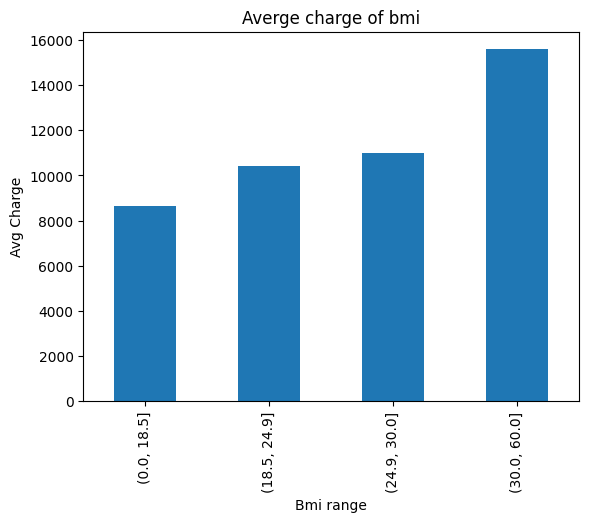

In [ ]:
bmi_range = pd.cut(df['bmi'] , bins=[0,18.5 , 24.9 , 30 , 60])

charge_per_bmi = df.groupby(bmi_range)['charges'].mean()
charge_per_bmi.plot(kind='bar')

plt.xlabel("Bmi range")
plt.ylabel("Avg Charge")
plt.title("Averge charge of bmi")

plt.show()

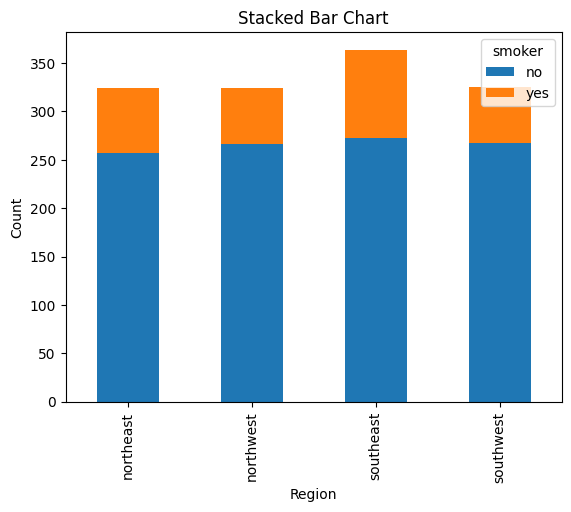

In [ ]:
stacked_data = df.groupby(['region', 'smoker']).size().unstack()
stacked_data.plot(kind='bar', stacked=True)
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Stacked Bar Chart')
plt.show()

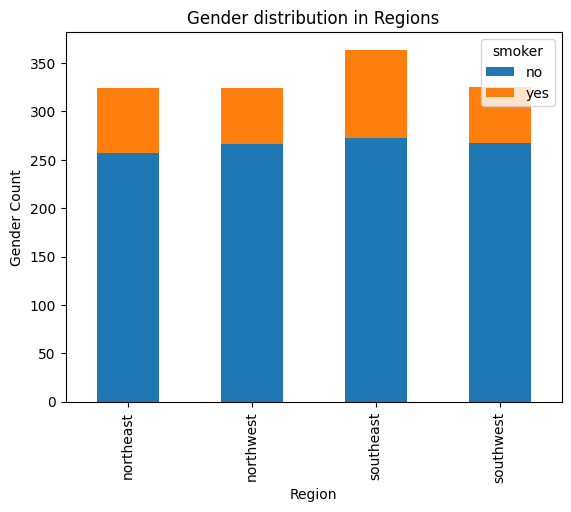

In [ ]:
stacked_date = df.groupby(['region' ,'sex']).size().unstack()
stacked_data.plot(kind='bar',stacked=True)

plt.xlabel("Region")
plt.ylabel("Gender Count")
plt.title("Gender distribution in Regions")

plt.show()

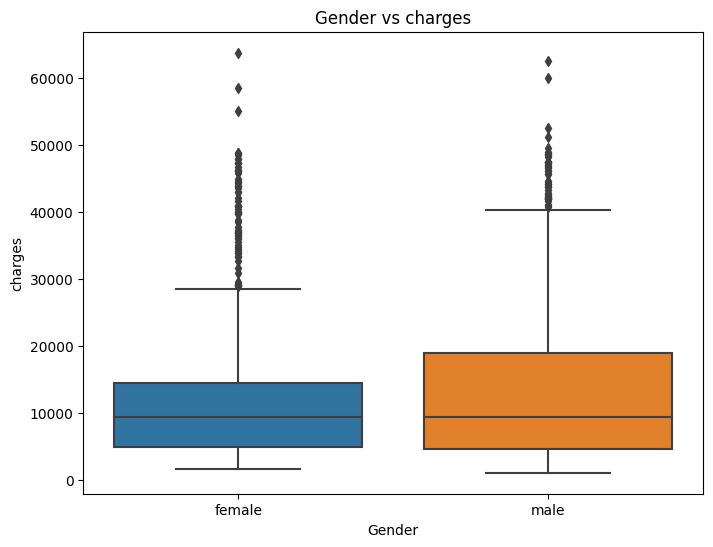

In [ ]:
#box plot

plt.figure(figsize=(8,6))
sns.boxplot(x=df['sex'], y=df['charges'])
plt.xlabel("Gender")
plt.ylabel("charges")

plt.title("Gender vs charges")

plt.show()

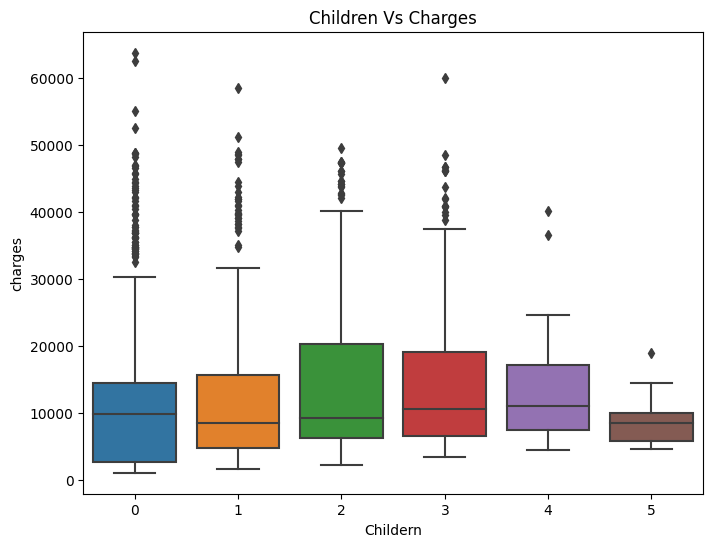

In [ ]:
plt.figure(figsize=(8,6))

sns.boxplot(data=df , x='children' , y='charges')
plt.xlabel("Childern")
plt.ylabel("charges")

plt.title("Children Vs Charges")

plt.show()

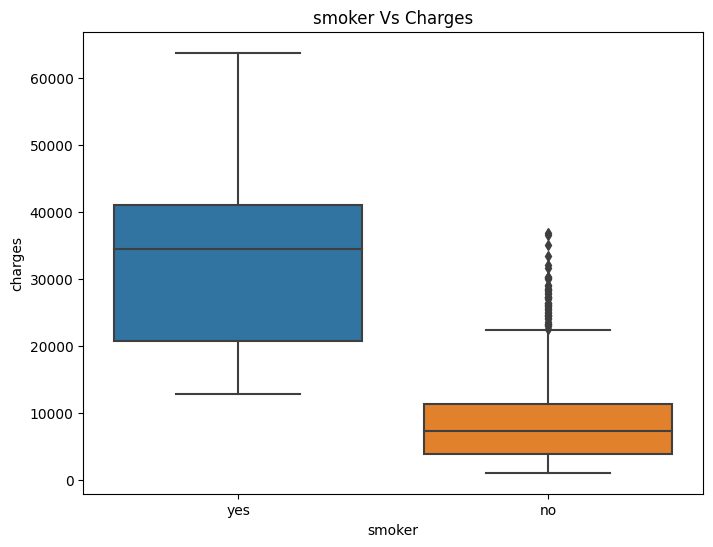

In [ ]:
plt.figure(figsize=(8,6))

sns.boxplot(data=df , x='smoker' , y='charges')
plt.xlabel("smoker")
plt.ylabel("charges")

plt.title("smoker Vs Charges")

plt.show()

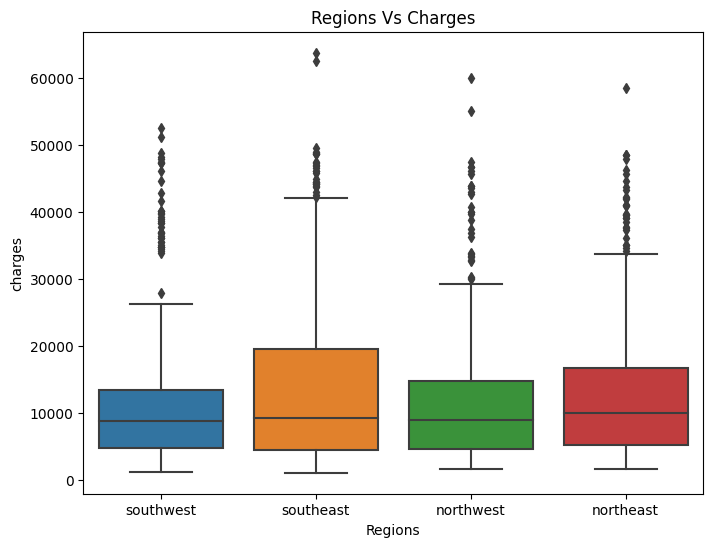

In [ ]:
plt.figure(figsize=(8,6))

sns.boxplot(data=df , x='region' , y='charges')
plt.xlabel("Regions")
plt.ylabel("charges")

plt.title("Regions Vs Charges")

plt.show()

In [ ]:
#Converting Categorical columns into numerical values using one-hot encoding

categories = ['sex' ,'region','smoker']

df1 = pd.get_dummies(df ,  columns = categories , drop_first=True)
df1

,age,bmi,children,charges,sex_male,region_northwest,region_southeast,region_southwest,smoker_yes
0,19,27.900,0,16884.92400,0,0,0,1,1
1,18,33.770,1,1725.55230,1,0,1,0,0
2,28,33.000,3,4449.46200,1,0,1,0,0
3,33,22.705,0,21984.47061,1,1,0,0,0
4,32,28.880,0,3866.85520,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,1,0,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,1,0,0
1336,21,25.800,0,2007.94500,0,0,0,1,0


<Axes: >

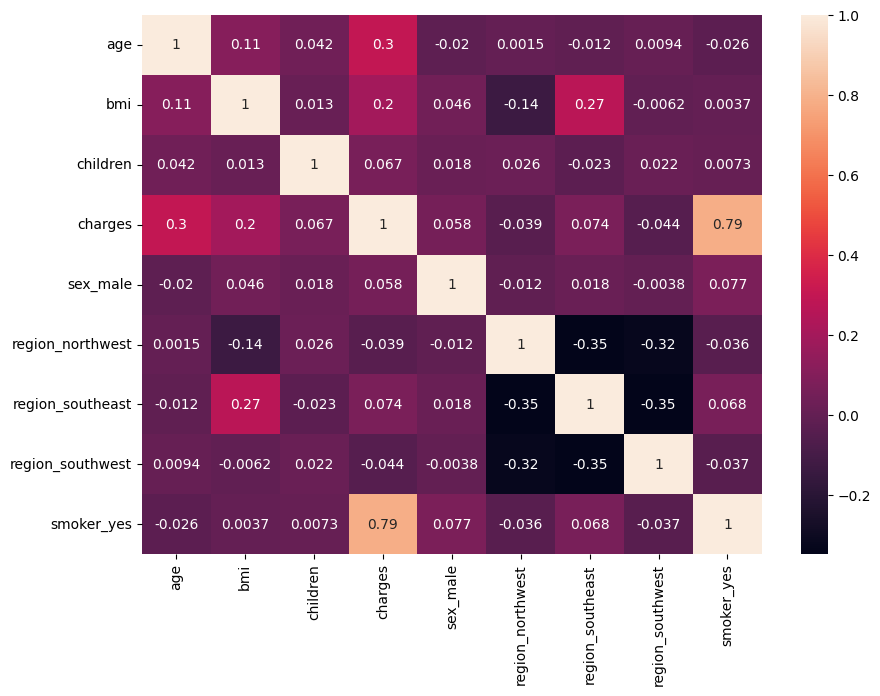

In [ ]:
#Correlation Matrix
plt.figure(figsize=(10,7))

sns.heatmap(df1 .corr(), annot=True)


Here we can see that charges is highly correlated with smoker_yes


In [ ]:
#Linear Regression
#Selecting X and Y

x= pd.DataFrame(df1 , columns=['age','bmi','children','sex_male','region_northwest','region_southeast','region_southwest','smoker_yes'])

y=df1['charges']

In [ ]:
#Train=test split
x_train , x_test , y_train , y_test =  train_test_split(x , y, test_size=0.3 , random_state=0)

In [ ]:
scaler = StandardScaler()
scaler.fit(x_train)
scaled_x_train = scaler.transform(x_train)
scaled_x_test = scaler.transform(x_test)

In [ ]:
regs = LinearRegression()
regs.fit(x_train , y_train)

LinearRegression()

In [ ]:
y_pred= regs.predict(x_test)

In [ ]:
def linear_score_errors(x_test , y_test , model):
  y_pred = regs.predict(x_test)
  mse  = metrics.mean_absolute_error(y_test , y_pred)
  msqe = metrics.mean_squared_error(y_test , y_pred)
  rs  = metrics.r2_score(y_test  , y_pred)

  print("Mean Absolute error : ",mse)
  print("Mean squared error :",msqe)
  print("R squared error :", rs)

In [ ]:
linear_score_errors(x_test , y_test , regs)

Mean Absolute error :  4240.869937991884
Mean squared error : 38832590.88652552
R squared error : 0.7628682417769728


In [ ]:
def compare(y_test , y_pred):
  compare = pd.DataFrame()
  compare['Actual']= y_test
  compare['predict']= y_pred
  compare['Diff']= abs (y_test-y_pred)
  return compare


In [ ]:
compare(y_test, y_pred)

,Actual,predict,Diff
1248,1633.96180,5166.958334,3532.996534
610,8547.69130,9601.121191,1053.429891
393,9290.13950,11400.879099,2110.739599
503,32548.34050,26117.898110,6430.442390
198,9644.25250,7001.185205,2643.067295
...,...,...,...
1320,5425.02335,7318.981256,1893.957906
97,10226.28420,13622.701899,3396.417699
786,12741.16745,15258.212374,2517.044924
1181,2850.68375,3946.527741,1095.843991


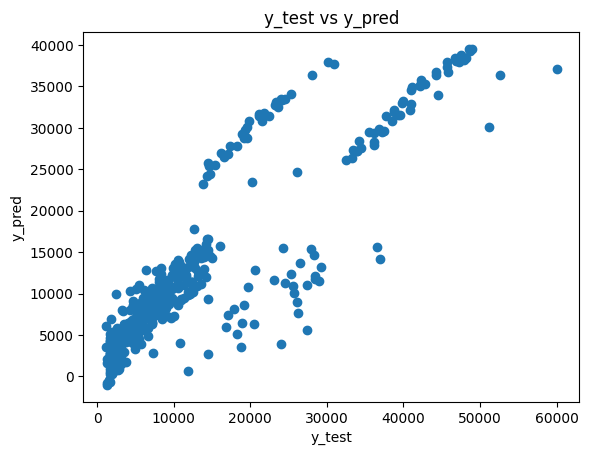

In [ ]:
plt.scatter(y_test ,y_pred)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.title("y_test vs y_pred")
plt.show()

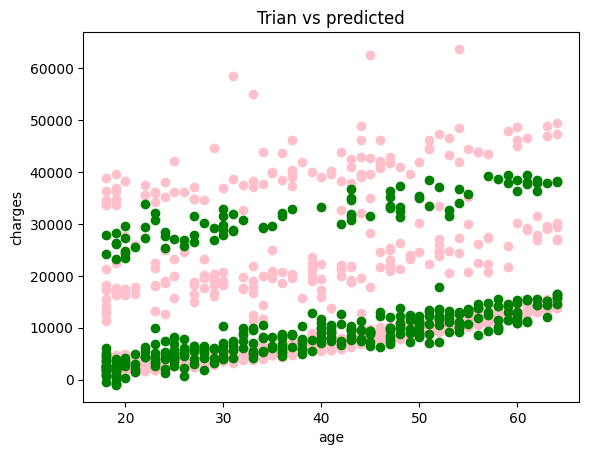

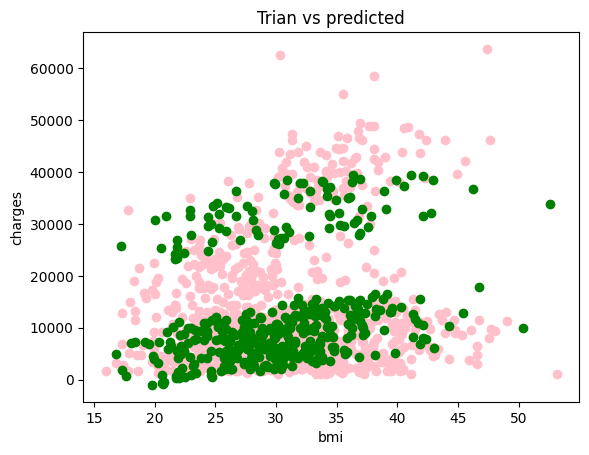

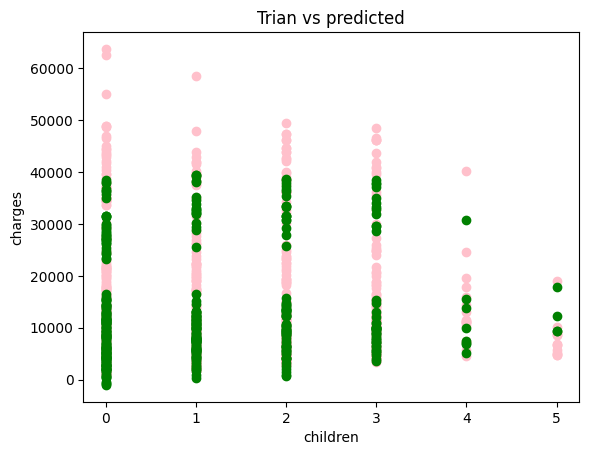

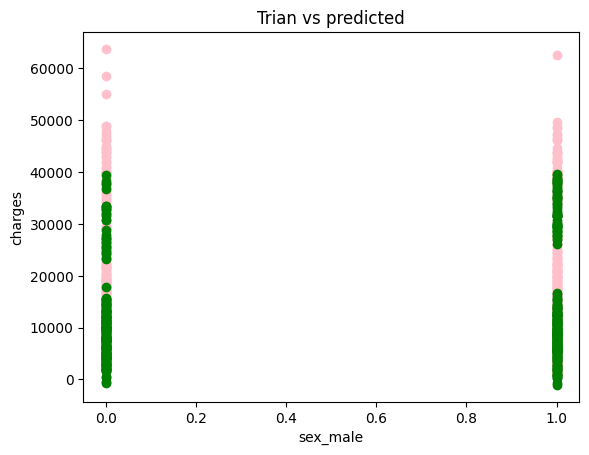

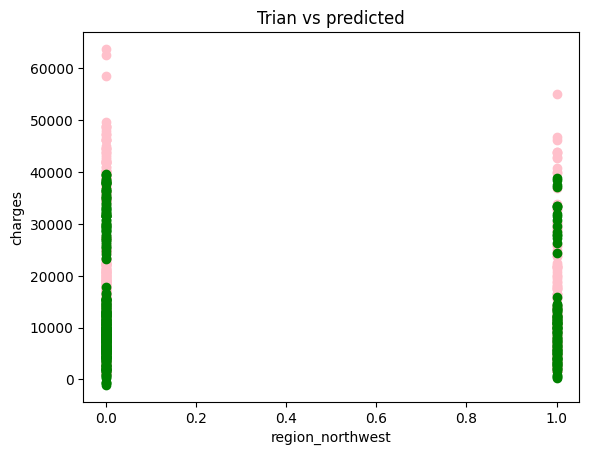

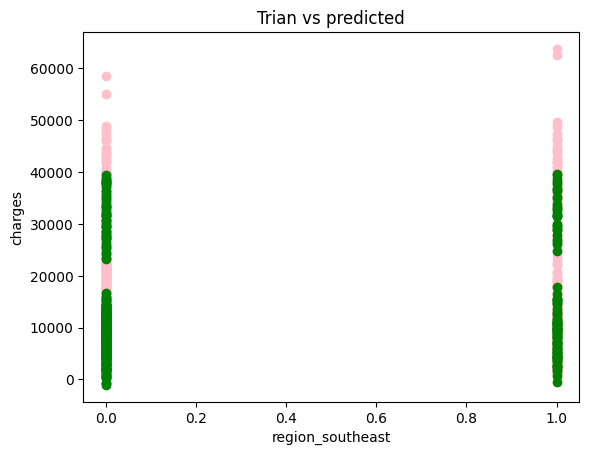

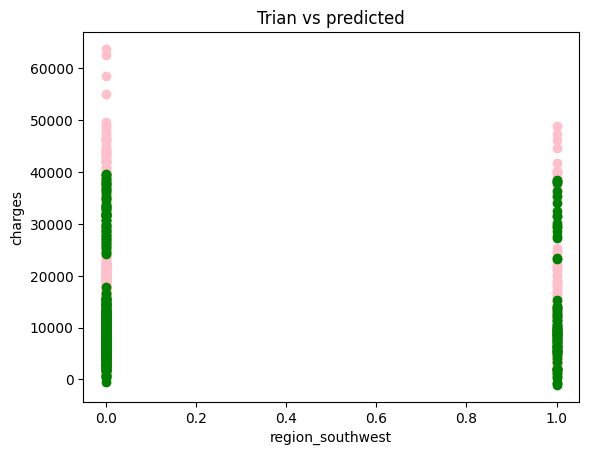

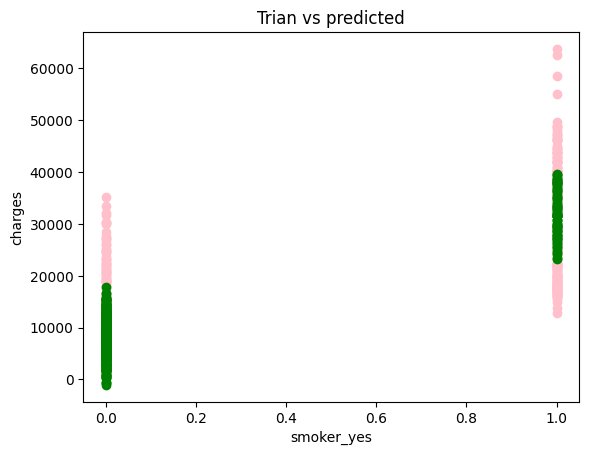

In [ ]:
for i in x_train.columns:
  plt.scatter(x_train[i] , y_train ,color='pink')
  plt.scatter(x_test[i] , y_pred , color='green')
  plt.title("Trian vs predicted")
  plt.xlabel(f"{i}")
  plt.ylabel(f"charges")
  plt.show()

